<a href="https://colab.research.google.com/github/sujan011/ARDENT_ML_INTERNSHIP/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast cancer ditection**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # to standarrize the features of the datasets
from sklearn.linear_model import LogisticRegression # used to build the predictive model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # for evaluating how well the built model performs

# load_breast_cancer -> gives a real medical datasets
# StandardScaler -> for feature sclaing
# LogisticRegression -> classification model

In [ ]:
# Load the dataset

data = load_breast_cancer()

X = data.data   # features
y = data.target # labels


print("Feature shape:", X.shape)
print("Target shape:", y.shape)
print("Target names:", data.target_names)
print("Number of features:", len(data.feature_names))

Feature shape: (569, 30)
Target shape: (569,)
Target names: ['malignant' 'benign']
Number of features: 30


In [ ]:
#3rd Step: see the features

df = pd.DataFrame(X, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# 4th Step: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42,stratify =y           # stratify=y (keeps class ratio similar in train & test)
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 455
Test size: 114


In [ ]:
# 5th step: Feature Scaling: transforming features to similar scale (mean ≈ 0, std ≈ 1)

scaler = StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 6th step: Train Logistic Regression model

logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train_scaled,y_train)

# Logistic Regression finds weights for each feature.
# It computes a probability that tutor is benign/malignant using the sigmoid function
# If probablitiy > threshold (0.5), predicts class 1, else 0

LogisticRegression(max_iter=1000)

In [ ]:
#7th step: Predictions & Accuracy

y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .4f}")

# Remember it: Accuracy = (correct predictions)/ (total predictions)

Accuracy:  0.9825


In [ ]:
# 8th step: Confusion Matrix + Classification Report

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)
print("\n Classfication Report:")

print(classification_report(y_test, y_pred, target_names=data.target_names))

Confusion Matrix: 
 [[41  1]
 [ 1 71]]

 Classfication Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



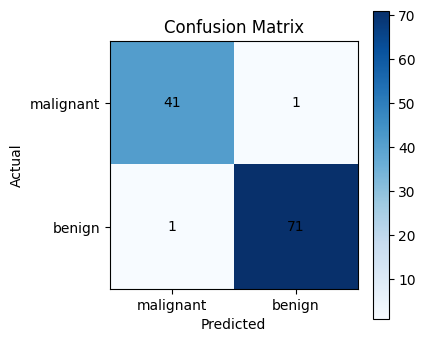

In [ ]:
# 9th Step: Visualize Confusion Matrix

plt.figure(figsize=(4,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], data.target_names)
plt.yticks([0, 1], data.target_names)

for i in range(2):
  for j in range(2):
    plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()